# 基本

## 模板Template

### function template

In [ ]:
#include <iostream>
using namespace std;
//函式template
template <class T> T myAdd(T a, T b);
int main(){
	int a = 1, b = 2;
	double x = 0.1, y = 0.2;
	cout << "int a+b = " << myAdd(a, b) << endl;
	cout << "double x+y = " << myAdd(x, y) << endl;
}
template <class T> T myAdd(T a, T b) {
	return a + b;
}

### class template

In [ ]:
//Stack.h
#pragma once
#ifndef STACK_H
#define STACK_H

// 宣告 class template
template< typename T >
class Stack
{
public:
	Stack(int = 10); //預設建構子(Stack size 10)
	~Stack() //解構子
	{
		delete[] stackPtr; 
	}

	// 宣告function template
	bool push(const T&); // push an element onto the Stack
	bool pop( T& ); //pop an element off the Stack

	// 宣告如果Stack是空的話
	bool isEmpty() const
	{
		return top == -1;
	}
	// 宣告Stack is full
	bool isFull() const
	{
		return top == size - 1;
	}
private:
	int size;
	int top;
	T* stackPtr;
};

// 定義class template
// Stack 建構子模板
template < typename T >
Stack < T >::Stack(int s) 
	: // 初始化size top stackPtr
	size(s > 0 ? s : 10),
	top(-1),
	stackPtr(new T[size])
{
	// empty body
}

// function template push
template <typename T >
bool Stack<T>::push(const T& pushValue)
{
	if (!isFull())
	{
		stackPtr[++top] = pushValue; //place item on stack
		return true; // push successful
	}
	return false; // push unsuccessful
}

template <typename T>
bool Stack<T>::pop(T& popValue)
{
	if (!isEmpty())
	{
		popValue = stackPtr[top--]; //remove item from Stack
		return true;
	}
	return false;
}

#endif // !STACK_H

In [ ]:
// Source.cpp
#include <iostream>
#include "Stack.h"
using namespace std;
int main(){
	Stack<double> doubleStack(5);//size = 5
	double doubleValue = 1.1;
	cout << "Pushing elements from doubleStack\n";
	// push 5 doubles onto doubleStack
	while (doubleStack.push(doubleValue))
	{
		cout << doubleValue << ' ';
		doubleValue += 1.1;
	}
	cout << "\nStack is full. Cannot push" << doubleValue
		<< "\n\nPopping elements from foubleStack\n";
	// pop elements from doubleStack
	while (doubleStack.pop(doubleValue))
		cout << doubleValue << ' ';
	cout << "\nStack is empty. Cannot pop\n";
}

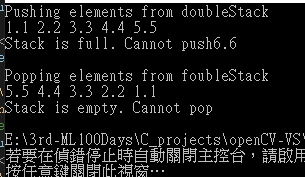

## & reference應用

### function中的&參數 用途

In [ ]:
#include <iostream>
using namespace std;

int increment(int& n) {  //有&
    n = n + 1;
    return n;
}

int main() {
    int x = 10;
    cout << increment(x) << endl;
    cout << x << endl;
    return 0;
}

In [ ]:
#include <iostream>
using namespace std;

int increment(int n) {  //沒有&
    n = n + 1;
    return n;
}

int main() {
    int x = 10;
    cout << increment(x) << endl;
    cout << x << endl;
    return 0;
}